In [1]:
from env2 import parallel_env
import supersuit as ss
from stable_baselines3.common.vec_env import VecTransposeImage, VecMonitor
import matplotlib.pyplot as plt
import numpy as np

In [2]:
num_agents = 9
def setup_environment(num_envs):
    """Configures the environment."""
    env = parallel_env(
        num_agents=num_agents,
        ep_length=600,
    )
    env = ss.observation_lambda_v0(env, lambda x, _: x["curr_obs"], lambda s: s["curr_obs"])
    env = ss.frame_stack_v1(env, 1)
    env = ss.pettingzoo_env_to_vec_env_v1(env)
    env = ss.concat_vec_envs_v1(
        env,
        num_vec_envs=num_envs,
        num_cpus=1,
        base_class="stable_baselines3"
    )
    env.get_attr = lambda x, y: ["human" for _ in range(env.num_envs)]
    env = VecMonitor(env)
    env = VecTransposeImage(env)
    return env

In [3]:
env = setup_environment(1)

0 11
0 9
0 11
0 10
0 10
0 9
1 10
0 10
1 10
0 10
1 10
1 10
0 11
0 11
0 10
0 9
1 10
0 10


In [4]:
obs = env.reset()
obs[0].shape

0 11
1 10
0 10
0 11
0 9
0 9
1 10
0 10
0 11


/home/assaf_caftory/miniconda3/envs/danfoa/lib/python3.11/site-packages/pettingzoo/utils/conversions.py:320: UserWarning: The `infos` dictionary returned by `env.reset` was empty. OverwritingAgent IDs will be used as keys
  warnings.warn(


(3, 21, 21)

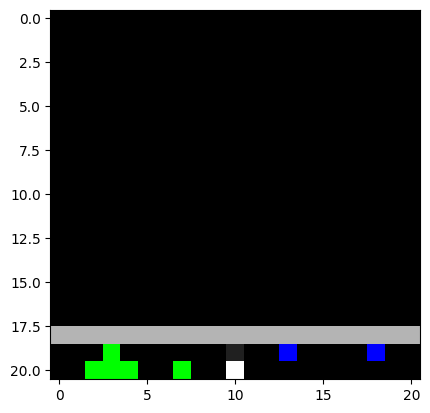

In [15]:
plt.imshow(np.swapaxes(obs[5], 0, 2))

0 9
0 10
0 10
0 10
0 10
0 9
0 10
0 11
0 10


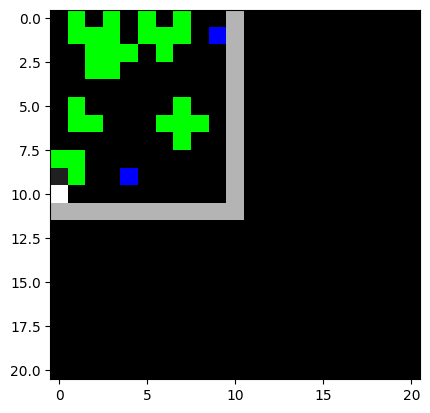

In [23]:
obs, rewards, dones, infos= env.step([5] + [5] * (num_agents-1))
plt.imshow(np.swapaxes(obs[0], 0, 2))
pass

In [7]:
import numpy as np
import cv2

world_map = env.venv.venv.venv.vec_envs[0].par_env.env.aec_env.env.env.env.ssd_env.world_map
video_resolution = tuple(np.array(world_map.shape[::-1])*32)
def _play(render=True):
    obs = env.reset()
    frames = []
    done = [False] * 2
    rewards = []
    frames = []
    while not (True in done):
        actions = np.array([env.action_space.sample() for _ in range(num_agents)])
        obs, reward, done, info = env.step(actions.astype(np.uint8))
        try:
            rewards.append(sum([f['true_reward'] for f in info]))
        except:
                rewards.append(reward)
        if render:
            frame = env.venv.venv.venv.vec_envs[0].par_env.env.aec_env.env.env.env.ssd_env.render()
            frames.append(cv2.resize(frame, video_resolution, interpolation=cv2.INTER_NEAREST))

            # frames.append(frame)
    return np.array(rewards).sum(), frames

def save_video(video_path, rgb_arrs, format="mp4v"):
    print("Rendering video...")
    fourcc = cv2.VideoWriter_fourcc(*format)
    video = cv2.VideoWriter(video_path, fourcc, float(15), video_resolution)

    for i, image in enumerate(rgb_arrs):
       video.write(image.astype(np.uint8))

    video.release()

In [8]:
score, frames = _play(render=True)
file_name = f"test.mp4"
save_video(file_name, frames)

0 9
0 10
0 11
0 11
1 10
0 10
0 9
0 9
0 10
0 9
0 9
0 11
0 11
1 10
0 10
0 9
0 9
0 10
0 9
0 9
1 10
0 10
1 10
0 10
0 9
0 9
0 10
0 9
0 10
0 9
0 9
1 10
0 11
0 9
1 10
0 9
0 9
0 10
0 9
0 9
0 9
0 11
0 9
1 10
0 9
0 10
0 10
0 9
0 9
0 9
0 11
0 9
1 10
0 9
0 10
0 10
0 9
0 10
0 10
0 11
0 9
1 10
0 9
0 11
0 10
0 9
0 10
0 11
0 11
0 9
1 10
0 9
0 11
0 10
0 9
0 10
0 11
1 10
0 9
1 10
0 9
0 11
0 10
0 9
0 10
0 10
1 10
0 9
1 10
0 9
1 10
0 9
1 10
0 9
0 10
1 10
0 10
1 10
0 9
1 10
0 9
1 10
0 9
0 10
1 10
0 10
0 9
0 9
0 11
0 9
1 10
0 9
0 10
1 10
0 10
0 9
0 10
1 10
0 9
1 10
0 9
0 10
1 10
0 11
0 9
0 11
1 10
0 9
1 10
0 9
0 10
1 10
0 11
0 9
0 11
0 9
0 9
1 10
0 9
0 10
1 10
0 11
0 9
0 11
0 10
1 10
1 10
0 9
0 10
1 10
0 11
0 9
0 11
0 10
1 10
0 11
0 9
0 10
1 10
1 10
0 9
0 11
0 10
1 10
0 11
0 9
0 9
0 9
0 9
0 9
0 11
0 10
1 10
0 10
0 9
0 9
0 9
0 9
0 10
0 11
0 10
0 11
0 10
0 9
1 10
0 9
0 10
0 10
0 11
0 10
0 11
0 10
0 9
1 10
0 10
0 11
0 11
0 11
0 10
0 11
0 10
0 9
1 10
0 10
0 11
0 11
1 10
0 10
1 10
0 10
0 10
1 10
0 11
1 10
0 11
1